Shared document to build and understand the suicide rate knowledge graph.

CS 575
Winter 2023

Brigham Young University

***
It helps to start with an overview of the data

In [1]:
from DatabaseManager import DatabaseManager # I don't know if it's good form to do this or not
database = DatabaseManager('datasets/suicide_rates_by_category.csv')
database.showHead()


   country  year     sex          age  suicides_no  population  suicides_pop   
0  Albania  1987    male  15-24 years           21      312900          6.71  \
1  Albania  1987    male  35-54 years           16      308000          5.19   
2  Albania  1987  female  15-24 years           14      289700          4.83   
3  Albania  1987    male    75+ years            1       21800          4.59   
4  Albania  1987    male  25-34 years            9      274300          3.28   

  country-year  HDI_for_year  gdp_for_year  gdp_per_capita       generation  
0  Albania1987           NaN    2156624900             796     Generation X  
1  Albania1987           NaN    2156624900             796           Silent  
2  Albania1987           NaN    2156624900             796     Generation X  
3  Albania1987           NaN    2156624900             796  G.I. Generation  
4  Albania1987           NaN    2156624900             796          Boomers  


In [2]:
database.showInfo()
del database 
# I don't want to get confused later on in the notebook. 
# Deleting the database object will help keep small notebook blocks self contained.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  int64  
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB
None


***
We now need to decide on the graph schema. The DatabaseManager and GraphDatabaseManager classes depend on the graph schema we choose. The following schema just groups creates a node for each relevant row-column entry. We'd have to figure out how to merge things we care about later. Ignoring a lot of the columns for now.

![Graph schema version 0 of suicide database](GraphSchema_version0.svg)

A challenge with this kind of graph schema is merging nodes into meta categories. A second challenge is that suicide rate is a number which means that we could end up with one suicide rate number for every entry in the table. Let's address the second challenge by finding natural bins into which we can group suicide rates.

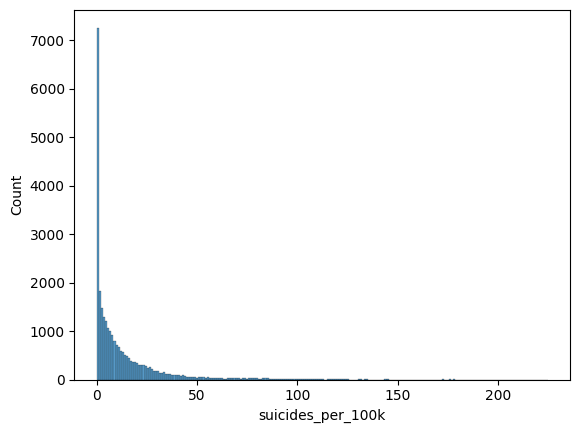

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Code patterned after https://www.kaggle.com/code/chingchunyeh/suicide-rates-overview-1985-to-2016
df = pd.read_csv('datasets/suicide_rates_by_category.csv')
df.rename(columns={"suicides/100k pop":"suicides_per_100k","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
#df.head()
sns.histplot(data=df,x="suicides_per_100k")
plt.show()



It looks to me like bins of around 25 will work well. This gives
 - 0-24
 - 25-49
 - 50-74
 - 75-99
 - 100-124
 - 125-149
 - 150-300 